# 绘制风羽图

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用barbs()实现" data-toc-modified-id="使用barbs()实现-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用barbs()实现</a></span></li></ul></div>

## 使用barbs()实现

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# 设置绘制标准与气象匹配
barb_increments = {'half': 2, 
                   'full': 4,
                   'flag': 20}

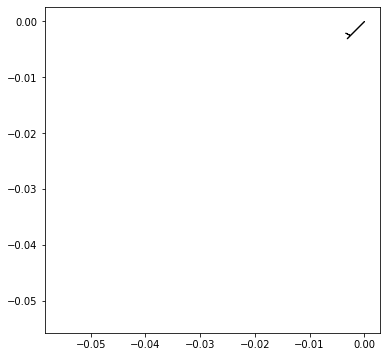

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barbs(0, 0, np.sqrt(2), np.sqrt(2), barb_increments=barb_increments)
plt.show()

In [5]:
file = r'../data/station_pollution.xls'
df = pd.read_excel(file, usecols=[1, 2, 6, 7, 13, 16], na_values='—')
data = df[df['站点'] == '中堂']
data.loc[:, '时间'] = data['时间'].apply(lambda s: datetime.strptime(s, '%Y年%m月%d日 %H时'))
data.reset_index(drop=True, inplace=True)
data

,站点,时间,风向,风速,PM10,PM2.5
0,中堂,2019-07-16 00:00:00,176.3,1.9,50,26
1,中堂,2019-07-16 01:00:00,193,1.8,61,25
2,中堂,2019-07-16 02:00:00,189.8,1.4,58,26
3,中堂,2019-07-16 03:00:00,189.3,1.2,55,27
4,中堂,2019-07-16 04:00:00,186.3,0.4,57,28
...,...,...,...,...,...,...
140,中堂,2019-07-21 20:00:00,205.1,1.3,51,20
141,中堂,2019-07-21 21:00:00,212.6,1.1,56,19
142,中堂,2019-07-21 22:00:00,233.3,0.9,41,17
143,中堂,2019-07-21 23:00:00,181.9,0.5,45,19


+ 将风速小于2的过滤掉，不进行绘制

In [6]:
data.iloc[:, 2:] = data.iloc[:, 2:].astype('float')
data

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,站点,时间,风向,风速,PM10,PM2.5
0,中堂,2019-07-16 00:00:00,176.3,1.9,50.0,26.0
1,中堂,2019-07-16 01:00:00,193.0,1.8,61.0,25.0
2,中堂,2019-07-16 02:00:00,189.8,1.4,58.0,26.0
3,中堂,2019-07-16 03:00:00,189.3,1.2,55.0,27.0
4,中堂,2019-07-16 04:00:00,186.3,0.4,57.0,28.0
...,...,...,...,...,...,...
140,中堂,2019-07-21 20:00:00,205.1,1.3,51.0,20.0
141,中堂,2019-07-21 21:00:00,212.6,1.1,56.0,19.0
142,中堂,2019-07-21 22:00:00,233.3,0.9,41.0,17.0
143,中堂,2019-07-21 23:00:00,181.9,0.5,45.0,19.0


In [7]:
def qr(arr):
    degree, speed = arr
    radian = np.radians(90-degree)
    u, v = np.cos(radian) * speed, np.sin(radian) * speed
    return pd.Series([u, v], index=['U', 'V'])

In [8]:
uv = data.iloc[:, [2, 3]][data.iloc[:, 3]>=2].apply(qr, axis=1).reset_index()
uv

,index,U,V
0,37,-0.453303,1.947952
1,42,-1.606357,1.503202
2,57,-0.991451,2.185641
3,58,-0.781835,2.479664
4,59,-1.353752,1.472194
5,60,-0.307850,2.581710
6,64,2.688822,-0.781175
7,65,1.739782,1.795316
8,66,0.047643,2.099459
9,85,-1.562435,-2.443112


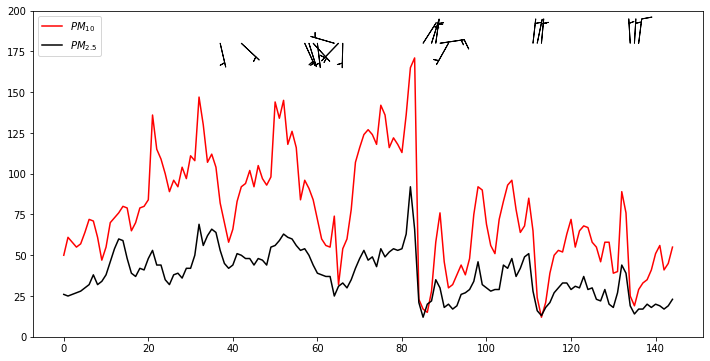

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(data.iloc[:, 4].to_numpy(), c='r', label='$PM_{10}$')
ax.plot(data.iloc[:, 5].to_numpy(), c='k', label='$PM_{2.5}$')
ax.set_ylim((0, 200))
ax.barbs(uv['index'].to_numpy(), [180]*len(uv), 
         uv['U'].to_numpy(), uv['V'].to_numpy(), barb_increments=barb_increments)
ax.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [ ]:
dlon, dlat = 60, 30   #设置步长
xticks = np.arange(0, 360.1, dlon)  #设置绘图范围
yticks = np.arange(-90, 90.1, dlat)

fig = plt.figure(figsize=(6,5)) #设置画布大小
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=180)) #添加图幅本体
ax.coastlines() #海岸线

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,linewidth=1, linestyle=':', color='k', alpha=0.8) #格网
gl.xlocator = mticker.FixedLocator(xticks)   #格网设置x轴刻度
gl.ylocator = mticker.FixedLocator(yticks)

ax.set_xticks(xticks, crs=ccrs.PlateCarree())  #图幅设置坐标轴刻度
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))  #设置坐标轴刻度标签格式
ax.yaxis.set_major_formatter(LatitudeFormatter())
fig_fname = "全球地图.png"

#plt.savefig(fig_fname, dpi=500, bbox_inches='tight')
# plt.savefig('F:/Rpython/lp11/plot2.png',dpi=1200)
plt.show()